# Expliquer le vote populiste en France

## Introduction

Principalement basé sur l’enquête les origines du populisme : enquête sur un schisme politique et social de Daniel Cohen, Martial Foucault et Yann Algan, notre projet tente d’expliquer causalement le populisme de droite, à la fois à l’aide de variables objectives et subjectives. Le livre référant est une vaste enquête électorale effectuée à l’échelle européenne essayant de dépasser les anciennes explications causales du vote populiste, notamment en utilisant des variables subjectives (principalement la confiance). Prenant comme base de données celle utilisée par les chercheurs, c’est-à-dire « l’european social survey -qui est une enquête à l’échelle européenne faite tous les deux ans dans 35 pays différents- nous avons à notre disposition un nombre important de variables, à la fois objectives et subjectives, pouvant être regroupées en 8 catégories différentes : confiance sociale, politique, bien-être subjectif, changement climatique, bien-être objectif, caractéristiques sociodémographiques, caractéristiques du répondant et valeurs de l’individu.

Dans notre projet, nous restreignons l’étude à celle du vote populiste de droite en France en 2016. Nous caractérisons le populisme comme un mouvement de rejet des élites traditionnelles et d’un ordre établi, c’est-à-dire un discours antisystème regroupant des individus ayant comme dénominateur commun l’insécurité économique. Cependant, l’objet de notre étude se restreint au populisme de droite. Le populisme de gauche pouvant être caractérisée par une radicalisation de la pensée de la gauche dite classique (ayant grossièrement pour projet la réduction des inégalités), celui de droit apparait expliquée quant à lui par un mouvement de rejet de l’autre. En effet, suite à la dissolution de la société industrielle dite classiste -pouvant être représentée schématiquement par une opposition binaire de deux classes sociales qui se font face- la société post-industrielle émerge et tend à dissoudre l’individu dans une société où il peine à retrouver les institutions socialisantes qui ont forgé son identité durant la société industrielle (en d’autres termes, on observe le passage d’une société de classes à une société de masse). Notre projet part de ce constat, et des intuitions offertes par l’étude électorale, qui tend à expliquer le vote populiste de droite par un rapport à l’altérité brisé, un rapport à l’autre dissolu, en bref par des « clivages d’ordre subjectif ».

On va ainsi tenter d’expliquer le vote populiste de droite à l’aune de cette rupture anthropologique pouvant être modélisée par un proxy de la confiance construit à partir de différentes variables subjectives. Notre première étape consistera donc à expliquer le vote populiste de droite avec un modèle logit-binaire grâce à des proxys que l’on aura construits préalablement. Ces proxys tenteront de recouvrir 5 caractéristiques d’ordre subjectif des individus : la confiance mais aussi le bien-être subjectif, le progressisme, l’engagement et la sécurité. Cependant, il nous semble intéressant de pousser l’analyse et de tenter d’expliquer ces variables subjectives caractéristiques du vote populiste de droite par des variables objectives individuelles (telles que le salaire ou encore l’âge), ce que nous ferons dans un second temps. Enfin, nous verrons si ces variables subjectives individuelles peuvent être aussi expliquées par des variables objectives macro (à l’échelle d’une région) telles que le taux de chômage, le taux de croissance de la population, l’éducation ou encore le PIB par habitant.

## Première partie : Le vote comme expression d'opinions subjectives

« L'isoloir planté dans une salle d'école ou de mairie est le symbole de toutes les trahisons que l'individu peut commettre envers les groupes dont il fait partie. ». Cette phrase suffirait presque à résumer l'argumentaire de Sartre dans son célèbre texte "Élections, piège à cons", publié dans la revue Les Temps Modernes en 1973. Pour Sartre, le fait que la pratique du vote soit dans nos démocraties modernes un acte individuel empêche les classes sociales de porter collectivement leur intérêt, car chacun peut se défiler au moment de prendre la décision importante qui est celle d'élire les réprésentants du peuple. En effet, le ressenti individuel du votant peut ne pas correspondre à l'analyse objective que ferait un observateur extérieur de ce que devrait chosir le votant en fonction de ses caractéristiques socio-économiques objectives (niveau d'éducation, revenu,... en bref sa classe sociale). Or, c'est bien ce ressenti individuel et subjectif qui détermine en dernière instance le vote. Les caractéristiques individuelles objectives ne sont que des facteurs explicatifs parmi d'autres de ce ressenti. C'est pourquoi la sociologie électorale ne se contente pas de lier l'environnement social des individus à leur vote mais cherche également à collecter leur ressenti subjectif sur le monde dans lequel ils vivent.

La base de données à notre disposition permet justement de prendre en compte ce ressenti subjectif. En effet, la plupart des variables sont des réponses à des questions d'opinion. Le but de cette partie est de lier ce ressenti subjectif aux déclarations de vote (en particulier du vote FN) des individus. Devant l'étendue des variables et thématiques disponibles, nous avons construit 5 variables subjectives synthétiques nous semblant pertinentes pour expliquer le vote FN.

Avant d'expliquer comment nous construisons ces variables, on peut dans un premier temps décrire brièvement la base en question à l'aide de quelques statistiques descriptives.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.api as st
import statsmodels.formula.api as smf
import urllib
import bs4

In [23]:
base_indiv = pd.read_spss('base_indiv.sav', convert_categoricals=False)
base_indiv.shape

(2070, 539)

Comme on peut le voir, la base est extrêmement large. À l'aide du descriptif de chaque variable, que l'on peut trouver en ligne (http://nesstar.ess.nsd.uib.no/webview/index.jsp?v=2&submode=abstract&study=http%3A%2F%2F129.177.90.83%3A80%2Fobj%2FfStudy%2FESS9e02.0&mode=documentation&top=yes), nous avons présélectionné un sous-ensemble de 37 variables, qui recouvrent à notre sens l'essentiel des variables subjectives et objectives pertinentes pour notre problématique. Nous avons également veillé à ne pas chosir des variables redondantes. La description de chaque variable est disponible dans un document annexe (README).

In [24]:
base_indiv = base_indiv[["ess8_id", "nuts2", "ppltrst", "cptppola", "trstplt", "ccnthum", "polintr", "vote", "pbldmn","bctprd","pstplonl", "mbtru", "stflife", "stfedu", "stfhlth", "aesfdrk", "health",  "gincdif", "euftf", "imwbcnt", "ipstrgv", "mnrgtjb", "freehms", "imptrad", "rlgblg", "blgetmg", "crmvct", "prtvtcfr", "gndr", "agea", "chldhm", "edlvdfr","uemp3m", "tporgwk", "hinctnta", "lrscale", "pspwght"]]
base_indiv = base_indiv.rename(columns={'pspwght' : 'weight'})
base_indiv.describe()

,ppltrst,cptppola,trstplt,ccnthum,polintr,vote,pbldmn,bctprd,pstplonl,mbtru,...,prtvtcfr,gndr,agea,chldhm,edlvdfr,uemp3m,tporgwk,hinctnta,lrscale,weight
count,2070.000000,2055.000000,2059.000000,2024.000000,2069.000000,2003.00000,2068.000000,2065.000000,2068.000000,2063.000000,...,1059.000000,2070.000000,2069.000000,2070.000000,2068.000000,2066.000000,1936.000000,1884.000000,1916.000000,2070.000000
mean,4.583575,2.195134,2.893152,3.614625,2.559691,1.52671,1.856867,1.676513,1.803191,2.713524,...,8.600567,1.539614,52.377960,1.701449,10.130561,1.610842,3.620351,4.855626,5.079854,1.000000
std,2.143143,0.943060,2.094522,2.907148,0.970024,0.70722,0.350294,0.467920,0.397683,0.591605,...,3.167957,0.498549,18.929428,0.457733,6.134469,0.487677,1.176417,2.740380,2.409379,0.691451
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.228504
25%,3.000000,1.000000,1.000000,3.000000,2.000000,1.00000,2.000000,1.000000,2.000000,3.000000,...,9.000000,1.000000,38.000000,1.000000,6.000000,1.000000,3.000000,2.000000,3.000000,0.539700
50%,5.000000,2.000000,3.000000,3.000000,3.000000,1.00000,2.000000,2.000000,2.000000,3.000000,...,9.000000,2.000000,53.000000,2.000000,7.000000,2.000000,4.000000,5.000000,5.000000,0.803473
75%,6.000000,3.000000,4.000000,4.000000,3.000000,2.00000,2.000000,2.000000,2.000000,3.000000,...,10.000000,2.000000,67.000000,2.000000,15.000000,2.000000,4.000000,7.000000,7.000000,1.203349
max,10.000000,5.000000,10.000000,55.000000,4.000000,3.00000,2.000000,2.000000,2.000000,3.000000,...,16.000000,2.000000,99.000000,2.000000,26.000000,2.000000,6.000000,10.000000,10.000000,4.000000


On peut faire apparaître les valeurs manquantes de façon plus lisible.

In [25]:
base_indiv.isnull().sum()

ess8_id        0
nuts2          0
ppltrst        0
cptppola      15
trstplt       11
ccnthum       46
polintr        1
vote          67
pbldmn         2
bctprd         5
pstplonl       2
mbtru          7
stflife        2
stfedu        20
stfhlth        5
aesfdrk       48
health         2
gincdif       14
euftf         81
imwbcnt       27
ipstrgv       21
mnrgtjb        6
freehms       19
imptrad       14
rlgblg         8
blgetmg       39
crmvct         2
prtvtcfr    1011
gndr           0
agea           1
chldhm         0
edlvdfr        2
uemp3m         4
tporgwk      134
hinctnta     186
lrscale      154
weight         0
dtype: int64

On s'aperçoit que seule la variable prtvtcfr (parti choisi aux dernières élections nationales) a plus de 10% de valeurs manquantes. Comment expliquer cette lacune pour cette variable ? La variable vote (qui prend la valeur 1 quand l'individu a voté aux dernières élections, 2 quand il n'a pas voté et 3 quand il ne pouvait pas voter) donne un premier élément de réponse à cette question.

In [26]:
base_indiv['vote'].value_counts()

1.0    1199
2.0     553
3.0     251
Name: vote, dtype: int64

In [27]:
base_indiv['vote'][base_indiv['vote']==1].count() - base_indiv[base_indiv['prtvtcfr'].notnull()]['prtvtcfr'].count()

140

Les valeurs manquantes s'expliquent donc par les abstentionnistes (553), les non-inscrits sur les listes électorales (251) et ceux n'ayant pas voulu dire pour qui ils avaient voté (140). 

On cherche à décrire la population au sein de notre base de données:

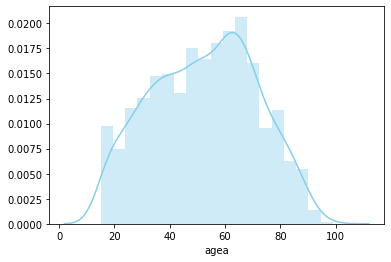

In [30]:
sns.distplot(base_indiv["agea"] , color="skyblue")

In [31]:
base_indiv["agea"].describe()

count    2069.000000
mean       52.377960
std        18.929428
min        15.000000
25%        38.000000
50%        53.000000
75%        67.000000
max        99.000000
Name: agea, dtype: float64

On a affaire à une population relativement agée avec pour moyenne environ 52 ans (alors que l'âge moyen en France est d'environ 40 ans).

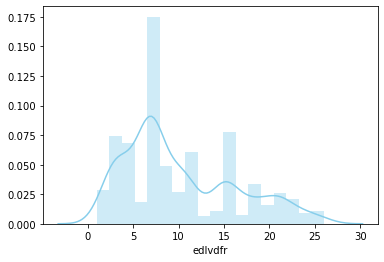

In [32]:
sns.distplot(base_indiv["edlvdfr"] , color="skyblue")

In [33]:
base_indiv["edlvdfr"].describe()

count    2068.000000
mean       10.130561
std         6.134469
min         1.000000
25%         6.000000
50%         7.000000
75%        15.000000
max        26.000000
Name: edlvdfr, dtype: float64

Il s'agit d'une population relativement peu éduquée, ayant pour score moyen 10 ce qui renvoie à un bac technologique. Mais étant donné que notre population est relativement agée et que la massification scolaire n'avait pas encore eu lieu, les résultats correspondent bien.

In [34]:
base_indiv['gndr'].describe()

count    2070.000000
mean        1.539614
std         0.498549
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: gndr, dtype: float64

Il y a donc 53% de femmes au sein de notre population (2= femme, 1=homme), ce qui correspond environ à la moyenne de la population française qui est de 51,5%.

Pour conclure, notre base de données correspond à une population d'individus relativement plus âgée que la population française, moins éduquée avec une représentation d'hommes et de femmes semblable à celle de la France.

## Construction des proxys

Nous cherchons dans notre projet à expliquer les déterminants du vote populiste de droite. Dans cette première partie, nous allons tenter de voir comment des variables subjectives individuelles sont capables ou non d'expliquer causalement ce type de vote. Nous avons décider de modéliser cinq proxy différents à cet effet, regroupant chacun entre 3 et 6 variable subjectives individuelles.

Tout d'abord, nous allons construire un proxy de la confiance car nous pensons intuitivement que la méfiance en autrui peut avoir un pouvoir explicatif fort du vote populiste de droite.  Ensuite, nous construisons la variable engagement qui correspond au fait que l'individu participe activement ou non à la vie de la cité en s'impliquant notamment par la biais de manifestations, ou en allant voter... On souhaite savoir si l'implication pourrait avoir un effet négatif sur le vote populiste  ou non.
Pensant que les individus votant pour le populisme de droit se sente subjectivement dans un mal être, nous construisons ensuite un proxy bien-être et nous pensons que cette variable aura un impact négatif sur la propension à voter pour le populisme.
Ensuite, nous nous intéréssons au proxy progressisme social qui regroupe l'opinion de l'individu sur des sujets sociétaux tels que son opinion sur la place de l'homme et de la femme dans la société et sur l'homosexuelalité. Nous supposons que cette variable aura un impact négatif sur le vote populiste. Enfin, nous construisons le proxy protection qui reflète comment l'individu se sent subjectivement dans la société, s'il se sent menacé. Nous pensons que les individus votant pour des partis populistes de droite se sentent menacés et donc que ce proxy aurait un impact positif sur ce type de vote.

Chaque proxy sera construit de la même manière: on regarde si les variables composantes du proxy que l'on aura choisi préalablement sont bien pertinentes en regardant la matrice de corrélation entre ces variables -on souhaite que les variables aient une corrélation positive et quantitativement significative, sans qu'elles se recoupent non plus parfaitement entre elles (sinon autant enlever celles qui sont redondantes). Ensuite, on normalise l'échelle de chaque variable pour qu'elle commence toujours à 0. Puis, on divise chaque variable par le nombre de valeurs possible moins un (car on commence à 0), de sorte que chaque variable du proxy prend une valeur entre 0 et 1. Ensuite, on fait la moyenne de ces variables (i.e. on divise par le nombre de variables qu'on a décidé d'inclure dans le proxy) puis on multplie par 10 pour avoir des proxys qui prennent leur valeur entre 0 et 10, ce qui correspond à la plupart des échelles des questions posées aux individus.

### Proxy confiance

Nous commençons par construire notre premier proxy, qui est celui de la confiance. Nous partons de quatre variables subjectives pour le construire qui sont:

-ppltrst, est-ce-que l'on peut faire confiance à la plupart des gens

-cptppola, confiance dans la participation personnelle en politique

-trstplt, confiance dans les hommes politiques et la politique en générale

-ccnthum, si la cause du réchauffement climatique est naturelle ou humaine. On interprète cette variable comme une mesure de la confiance de l'individu dans le discours scientifique.

In [35]:
base_indiv[['ppltrst', 'cptppola', 'trstplt', 'ccnthum']].describe()

,ppltrst,cptppola,trstplt,ccnthum
count,2070.000000,2055.000000,2059.000000,2024.000000
mean,4.583575,2.195134,2.893152,3.614625
std,2.143143,0.943060,2.094522,2.907148
min,0.000000,1.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,3.000000
50%,5.000000,2.000000,3.000000,3.000000
75%,6.000000,3.000000,4.000000,4.000000
max,10.000000,5.000000,10.000000,55.000000


On remarque que la variable ccnthum prend des valeurs 55. Cette valeur signifie que l'individu pense qu'il n'y a pas de changement climatique. Il y a donc une défiance de l'individu vis à vis du discours scientifique. On associe cette valeur à la valeur minimal de notre échelle c'est-à-dire 0.

In [38]:
base_indiv['ccnthum'].replace(to_replace = 55, value = 0, inplace = True)

Ensuite, on traite le problème des valeurs manquantes, en imputant la moyenne de la variable aux variables manquantes. Pour cela, on applique à toutes les colonnes concernées la fonction "fillna".

In [36]:
base_indiv[['ppltrst', 'cptppola', 'trstplt', 'ccnthum']] = base_indiv[['ppltrst', 'cptppola', 'trstplt', 'ccnthum']].apply(lambda x: x.fillna(x.mean()), axis = 0)

Nous nous intéréssons à ces quatre variables pour savoir si elles sont à mêmes d'expliquer la même chose, c'est-à-dire la confiance. Il faut donc que les corrélations entre ces quatre varibales aillent dans le même sens, et qu'elles soient quantitativement significatives pour que le proxy soit pertinent. 

In [39]:
base_indiv[['ppltrst', 'cptppola', 'trstplt', 'ccnthum']].corr()

,ppltrst,cptppola,trstplt,ccnthum
ppltrst,1.000000,0.172341,0.300675,0.040191
cptppola,0.172341,1.000000,0.170359,0.090967
trstplt,0.300675,0.170359,1.000000,-0.025156
ccnthum,0.040191,0.090967,-0.025156,1.000000


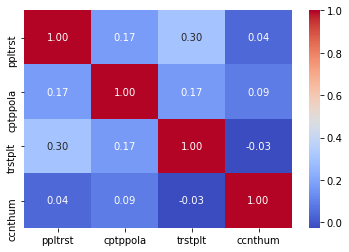

In [40]:
sns.heatmap(base_indiv[['ppltrst', 'cptppola', 'trstplt', 'ccnthum']].corr(), cmap='coolwarm', annot=True, fmt=".2f")

Toutes les variables sont corrélées dans le même sens, ce qui peut nous amener à penser qu'elles ont un effet causal commun qui est celui de la confiance. On cherche donc à construire notre proxy, qui serait une variable comprise entre 0 et 10 et qui pondérerait chacune des quatre variables de la même façon, que l'on finit par représenter graphiquement:

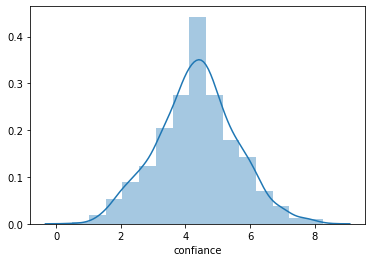

In [42]:
base_indiv['confiance'] = (base_indiv['ppltrst'] + base_indiv['trstplt'])/10 + (base_indiv['cptppola'] - 1)/4 + (base_indiv['ccnthum'])/5
base_indiv['confiance'] = base_indiv['confiance'] * 10/4
sns.distplot(base_indiv['confiance'], kde=True, bins = 15)

### Proxy engagement

Nous construisons désormais le proxy engagement qui correspond à la participation plus ou moins active de l'individu dans la vie politique. Ce proxy se construit à partir de six variables: 

-polintr, à quel point l'individu est intéréssé par la politique

-vote, si l'individu a voté aux dernières élections

-pbldmn, si l'individu participe à des manifestations

-bctprd, si l'individu participe à des boycotts de produits

-pstplonl, si l'individu publie ou non des choses sur internet

-mbtru, si l'individu est membre ou non d'un syndicat 

In [44]:
base_indiv[['polintr', 'vote', 'pbldmn', 'bctprd', "pstplonl",'mbtru']].describe()

,polintr,vote,pbldmn,bctprd,pstplonl,mbtru
count,2069.000000,2003.00000,2068.000000,2065.000000,2068.000000,2063.000000
mean,2.559691,1.52671,1.856867,1.676513,1.803191,2.713524
std,0.970024,0.70722,0.350294,0.467920,0.397683,0.591605
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.00000,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.00000,2.000000,2.000000,2.000000,3.000000
75%,3.000000,2.00000,2.000000,2.000000,2.000000,3.000000
max,4.000000,3.00000,2.000000,2.000000,2.000000,3.000000


Cependant, il semblerait que les variables que nous avons choisies pour notre proxy n'aient qu'un faible pouvoir explicatif pour déterminer le vote FN. En effet, à l'aide d'une matrice de corrélation, on voit que ces variables semblent très peu corrélées au vote FN, nous décidons alors de supprimer ce proxy dans notre analyse et de nous concentrer sur les 4 autres proxys (dont il nous en reste encore 3 à construire). 

In [ ]:
base_indiv[['FN', 'polintr', 'pbldmn' , 'bctprd', 'pstplonl', 'mbtru']].corr()

In [ ]:
sns.heatmap(base_indiv[['FN', 'polintr', 'pbldmn' , 'bctprd', 'pstplonl', 'mbtru']].corr(), cmap='coolwarm', annot=True, fmt=".2f")

### Proxy bien-être

Nous passons au proxy du bien-être qui correspond au bien-être ressenti subjectivement par l'individu. Ce proxy se construit à l'aide de 5 variables :

-stflife, à quel point l'individu est satisfait dans sa vie

-stfedu, opinion de l'individu sur le système éducatif du pays

-stfhlth, opinion de l'individu sur l'état du système de santé du pays

-health, état de santé estimé par l'individu

In [46]:
base_indiv[['stflife', 'stfedu', 'stfhlth', 'health']].describe()

,stflife,stfedu,stfhlth,health
count,2068.000000,2050.000000,2065.000000,2068.000000
mean,6.540619,4.752195,6.282809,2.354449
std,2.268779,2.136635,2.081298,0.910400
min,0.000000,0.000000,0.000000,1.000000
25%,5.000000,3.000000,5.000000,2.000000
50%,7.000000,5.000000,7.000000,2.000000
75%,8.000000,6.000000,8.000000,3.000000
max,10.000000,10.000000,10.000000,5.000000


Aucune valeur ne sort de l'échelle principale. Cependant, on remarque que la variable health ne va pas dans le même sens logique que les autres variables: si les trois autres considèrent les petites valeurs comme un mal-être ressenti par l'individu, la variable health quant à elle attribue aux petites valeurs un bon état de santé : on inverse donc l'échelle pour remédier à ce problème et que notre proxy ait du sens.

In [47]:
base_indiv['health'].replace(to_replace = [1,2,3,4,5], value = [5,4,3,2,1], inplace = True)

Ensuite, on traite le problème des valeurs manquantes, de la même façon que précédemment.

In [48]:
base_indiv[['stflife', 'stfedu', 'stfhlth', 'health']] = base_indiv[['stflife', 'stfedu', 'stfhlth', 'health']].apply(lambda x: x.fillna(x.mean()), axis = 0)

On souhaite désormais vérifier que les quatre variables aient un effet causal similaire, c'est-à-dire qu'elles aient une corrélation quantitativement significative, et de même signe ce qui est le cas:  (on décide donc de garder les quatre variables au sein de notre proxy).

In [49]:
base_indiv[['stflife', 'stfedu', 'stfhlth', 'health']].corr()

,stflife,stfedu,stfhlth,health
stflife,1.000000,0.192885,0.265723,0.294791
stfedu,0.192885,1.000000,0.386514,0.068878
stfhlth,0.265723,0.386514,1.000000,0.126034
health,0.294791,0.068878,0.126034,1.000000


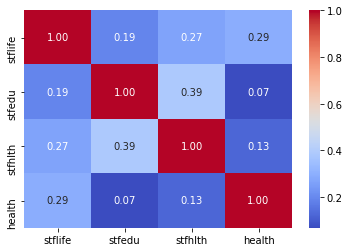

In [50]:
sns.heatmap(base_indiv[['stflife', 'stfedu', 'stfhlth', 'health']].corr(), cmap='coolwarm', annot=True, fmt=".2f")

On cherche donc à construire notre proxy, qui serait une variable comprise entre 0 et 10 et qui pondérerait chacune des quatre variables de la même façon:

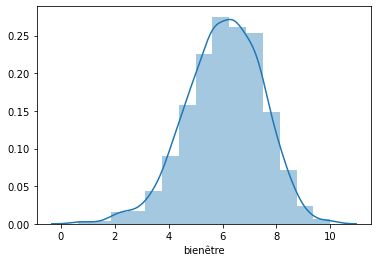

In [51]:
base_indiv['bienêtre'] = (base_indiv['stflife'] + base_indiv['stfedu'] + base_indiv['stfhlth'])/10 + (base_indiv['health'] - 1)/4
base_indiv['bienêtre'] = base_indiv['bienêtre'] * 10/4

sns.distplot(base_indiv['bienêtre'], kde=True, bins = 15)


### Proxy protection

On construit désormais le proxy de demande de protection des individus et du sentiment de sécurité. Ils se basent sur 5 variables: 

-gincdif, le gouvernement a pour mission de réduire les inégalités

-euftf, avis sur l'intégration européenne

-imwbcnt, avis de l'individu à propos des immigrants 

-aesfdrk, sentiment de sécurité 

-ipstrgv, le gouvernement doit être fort

In [52]:
base_indiv[['gincdif', 'euftf', 'imwbcnt', 'aesfdrk', 'ipstrgv']].describe()

,gincdif,euftf,imwbcnt,aesfdrk,ipstrgv
count,2056.000000,1989.000000,2043.000000,2022.000000,2049.000000
mean,2.073444,5.001508,4.822320,1.976261,2.468033
std,1.108672,2.579032,2.252706,0.913059,1.304693
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,3.000000,4.000000,1.000000,1.000000
50%,2.000000,5.000000,5.000000,2.000000,2.000000
75%,3.000000,7.000000,6.000000,2.000000,3.000000
max,5.000000,10.000000,10.000000,4.000000,6.000000


Aucune variable ne sort de l'échelle principale, nous pouvons continuer la modélisation du proxy. On remarque que la variable aesfdrk ne va pas dans le même sens que les autres variables dans la demande de protection: les petites valeurs reflètent un sentiment de sécurité alors que pour les autres variables, les petites valeurs reflètent un sentiment d'insécurité et une demande de protection. On inverse donc l'échelle des valeurs prises par cette variable.

In [53]:
base_indiv['aesfdrk'].replace(to_replace = [1,2,3,4], value = [4,3,2,1], inplace = True)

On traite le problème des valeurs manquantes.

In [54]:
base_indiv[['gincdif', 'euftf', 'imwbcnt', 'aesfdrk', 'ipstrgv']] = base_indiv[['gincdif', 'euftf', 'imwbcnt', 'aesfdrk', 'ipstrgv']].apply(lambda x: x.fillna(x.mean()), axis = 0)

Pour sélectionner les variables incluses dans le proxy, comme d'habitude, on regarde la significativité quantitative des corrélations entre les différentes variables et si elles sont bien toutes positives.

In [55]:
base_indiv[['gincdif', 'euftf', 'imwbcnt', 'aesfdrk', 'ipstrgv']].corr()

,gincdif,euftf,imwbcnt,aesfdrk,ipstrgv
gincdif,1.000000,-0.002400,-0.029112,0.017039,-0.012962
euftf,-0.002400,1.000000,0.302753,0.061424,0.070401
imwbcnt,-0.029112,0.302753,1.000000,0.208643,0.103918
aesfdrk,0.017039,0.061424,0.208643,1.000000,0.117486
ipstrgv,-0.012962,0.070401,0.103918,0.117486,1.000000


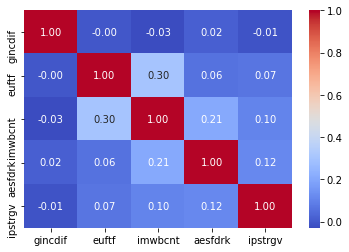

In [56]:
sns.heatmap(base_indiv[['gincdif', 'euftf', 'imwbcnt', 'aesfdrk', 'ipstrgv']].corr(), cmap='coolwarm', annot=True, fmt=".2f")

On remarque que les corrélations sont importantes entre toutes les variables sauf pour gincdif, c'est-à-dire la variable expliquant la volonté de l'individu d'avoir un état redistributeur. On enlève donc cette variable dans notre proxy que nous construisons désormais.

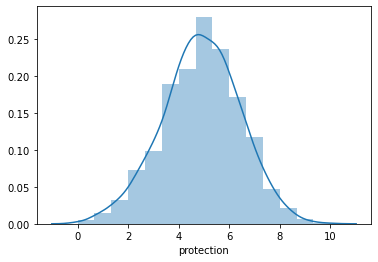

In [57]:
base_indiv['protection'] = (base_indiv['euftf'] + base_indiv['imwbcnt'])/10 + (base_indiv['aesfdrk'] - 1)/3 + (base_indiv['ipstrgv'] - 1)/5
base_indiv['protection'] = base_indiv['protection'] * 10/4
sns.distplot(base_indiv['protection'], kde=True, bins = 15)

### Proxy progressisme

Nous construisons notre dernière variable qui est un proxy du progressisme social de l'individu. Il est construit à partir de trois variables différentes: 

-mnrgtjb, avis sur le fait que les hommes soient avantagés sur le marché du travail

-freehms, opinion sur les homosexuels

-imptrad, opinion sur les traditions

In [58]:
base_indiv[['mnrgtjb', 'freehms', 'imptrad']].describe()

,mnrgtjb,freehms,imptrad
count,2064.000000,2051.000000,2056.000000
mean,4.462694,1.563140,3.321498
std,1.002452,0.969932,1.578519
min,1.000000,1.000000,1.000000
25%,4.000000,1.000000,2.000000
50%,5.000000,1.000000,3.000000
75%,5.000000,2.000000,5.000000
max,5.000000,5.000000,6.000000


Aucunes des trois variables ne sort de l'échelle. Comme précédemment, on remarque que la seconde variable ne va pas dans le même sens que les deux autres: une forte valeur correspond à quelqu'un de peu progressiste ( ce qui est l'inverse des deux autres). On  inverse donc l'échelle de cette variable.

In [59]:
base_indiv['freehms'].replace(to_replace = [1,2,3,4,5], value = [5,4,3,2,1], inplace = True)

On traite ensuite le problème des valeurs manquantes:

In [60]:
base_indiv[['mnrgtjb', 'freehms', 'imptrad']] = base_indiv[['mnrgtjb', 'freehms', 'imptrad']].apply(lambda x: x.fillna(x.mean()), axis = 0)

Pour les mêmes raisons que dans les proxys précédent, on regarde si les variables ont une corrélation quantitativement significative.

In [61]:
base_indiv[['mnrgtjb', 'freehms', 'imptrad']].corr()

,mnrgtjb,freehms,imptrad
mnrgtjb,1.000000,0.280177,0.151617
freehms,0.280177,1.000000,0.150261
imptrad,0.151617,0.150261,1.000000


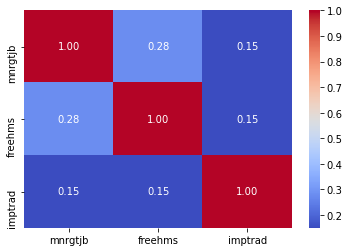

In [62]:
sns.heatmap(base_indiv[['mnrgtjb', 'freehms', 'imptrad']].corr(), cmap='coolwarm', annot=True, fmt=".2f")

On construit le proxy progressisme afin d'avoir une variable continue allant de O à 10 (comme pour les trois autres).

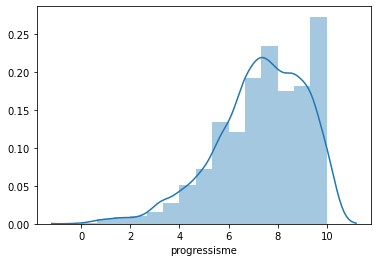

In [63]:
base_indiv['progressisme'] = (base_indiv['mnrgtjb'] + base_indiv['freehms'] - 2)/4 + (base_indiv['imptrad'] - 1)/5
base_indiv['progressisme'] = base_indiv['progressisme'] * 10/3

sns.distplot(base_indiv['progressisme'], kde=True, bins = 15)

#### Corrélation entre les proxys

Enfin, on souhaite regarder si les proxys sont corrélés entre eux. 

In [64]:
proxy = base_indiv[['confiance', 'bienêtre', 'protection', 'progressisme']]
proxy.corr()

,confiance,bienêtre,protection,progressisme
confiance,1.000000,0.315259,0.346430,0.106542
bienêtre,0.315259,1.000000,0.315217,0.091882
protection,0.346430,0.315217,1.000000,0.246093
progressisme,0.106542,0.091882,0.246093,1.000000


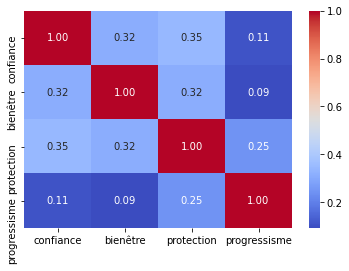

In [65]:
sns.heatmap(proxy.corr(), cmap='coolwarm', annot=True, fmt=".2f")

Les proxys sont bien corrélés entre eux, il est donc possible qu'ils expliquent la même variable (c'est-à-dire le vote populiste de droite). 

### Modèle avec variables subjectives

Maintenant que nous avons créé ces 5 proxys nous semblant pertinent pour expliquer le vote FN, nous allons les tester pour voir comment chacun influe sur la probabilité de voter pour le Front National. Pour ce faire, nous utilisons un modèle logistique binaire, car la variable d'intérêt est une variable de choix binaire (voter ou non pour le FN). Le but est donc d'évaluer la probabilité de voter FN en fonction des variables subjectives que nous avons construites. Or, utiliser dans ce cas un modèle linéaire classique est moins pertinent car cela peut conduire à estimer des probabilités qui sont en-dehors de l'intervalle [0,1]. Nous aurions pu également utiliser le modèle binaire probit (avec un terme d'erreur gaussien et non logistique), mais cela est moins courramment utilisé dans la littérature.

Tout d'abord, nous restreignons nos observations aux individus qui ont voté et qui ont déclaré pour qui ils avaient voté. Nous ne considérons pas les abstentionnistes car l'interprétation de l'abstention est difficile. En effet, celle-ci peut être l'expression d'un choix politique à part entière, ou d'une simple négligence, d'un oubli. L'analyse de l'abstention mériterait donc une analyse à part entière, distincte du vote populiste. En revanche, nous considérons les votes blanc et nul.

Nous créons donc une nouvelles base "base_indiv_vote", puis une variable indicatrice du vote FN (pour FN, prtvtcfr vaut 2).

In [66]:
base_indiv_vote = base_indiv.dropna(subset = ['prtvtcfr'])
base_indiv_vote['FN'] = np.where(base_indiv_vote['prtvtcfr'] == 2, 1, 0)
base_indiv_vote['FN'].mean()

<ipython-input-66-0db1edbf5ca6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_indiv_vote['FN'] = np.where(base_indiv_vote['prtvtcfr'] == 2, 1, 0)


0.11803588290840415

La proportion de votants FN parmi les votants est proche de 12%, ce qui sous-estime largement le résultats observé de Marine Le Pen au premier tour de l'élection de 2012 (qui est l'élection sur laquelle les individus étaient interrogés), qui était de près de 18%. On peut voir que le problème reste le même lorsque nous corrigeons pour les poids (représentant l'inverse de la probabilité d'être interrogé : plus celle-ci est faible, plus il faut donner de poids à l'individu). 

In [67]:
base_indiv_vote['FN_weight'] = base_indiv_vote['FN']*base_indiv_vote['weight']
base_indiv_vote['FN_weight'].mean()

<ipython-input-67-bac4d47ca8d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_indiv_vote['FN_weight'] = base_indiv_vote['FN']*base_indiv_vote['weight']


0.10789575241330213

Ceci peut être dû à la honte persistante que représente le vote FN en France. Cela justifie que nous délaisserons progressivement dans l'analyse cette variable et que nous nous concentrerons sur les déterminants des variables subjectives motivant le vote FN. Mais avant cela, il importe de montrer la pertinence de ces variables.
Tout d'abord, on peut noter que le vote populiste est mal interprétable selon le schéma classique opposant droite et gauche. Pour le montrer, considérons la variables lrscale, qui est un indicateur (sur une échelle de 0 à 10) de la place que se donne chacun sur l'échiquier politique (0 correspond à la place la plus à gauche et 10 à la place la plus à droite). Ce petit code permet de compter la proportion d'électeurs FN se plaçant sur la moitié gauche de l'échiquier politique.

In [114]:
base_indiv_vote['lrscale'][base_indiv_vote['FN']==1].quantile(q = [0.1, 0.35, 0.5, 0.9])

0.10     4.0
0.35     5.0
0.50     7.0
0.90    10.0
Name: lrscale, dtype: float64

On voit donc que 35% des électeurs FN se place sur la moitié gauche de l'échiquier politique! À l'inverse, cette proportion tombe à moins de 3% pour les électeurs UMP (pour l'UMP, prtvtcfr vaut 10).

In [118]:
base_indiv_vote['lrscale'][base_indiv_vote['prtvtcfr']==10].quantile(q = [0.03, 0.35, 0.5, 0.9])

0.03    5.0
0.35    7.0
0.50    7.0
0.90    9.0
Name: lrscale, dtype: float64

Ceci justifie d'avoir créé des proxy qui sont radicalement différent du clivage droite/gauche.

Nous allons maintenant nous intéresser à la pertinence de chaque proxy pris individuellement dans l'influence du vote FN. Pour chaque proxy, nous représentons graphiquement cet impact selon une spécification logistique. La courbe représente donc la probabilité de voter FN en fonction de la valeur du proxy considéré. Dans chaque cas, un intervalle de confiance à 95% est représenté. Pour rendre la lecture de ces graphiques plus agréable, l'attribut "y_jitter" permet d'introduire un petit aléa à la variable dépendante (FN), qui ne vaut plus exactement 0 ou 1 pour ne pas concentrer les points sur seulement deux valeurs en ordonnées.

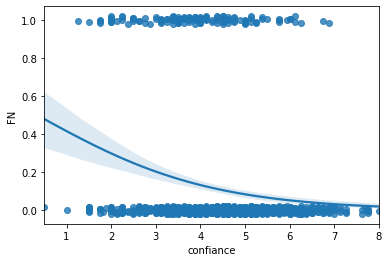

In [68]:
sns.regplot(x = 'confiance', y = 'FN', data = base_indiv_vote, y_jitter = 0.02, logistic = True)

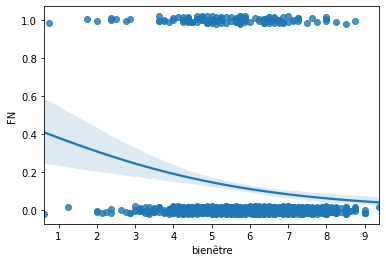

In [69]:
sns.regplot(x = 'bienêtre', y = 'FN', data = base_indiv_vote, y_jitter = 0.02, logistic = True)

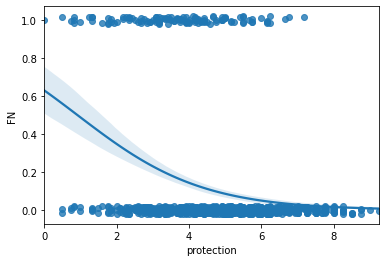

In [70]:
sns.regplot(x = 'protection', y = 'FN', data = base_indiv_vote, y_jitter = 0.02, logistic = True)

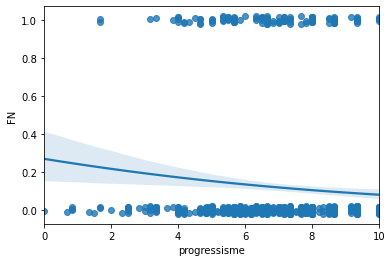

In [71]:
sns.regplot(x = 'progressisme', y = 'FN', data = base_indiv_vote, y_jitter = 0.02, logistic = True)

Tous les proxy semblent significatifs, et plus particulièrement les proxy protection, confiance et bien-être. Nous pouvons maintenant le vérifier formellement par des régressions logistiques. Pour cela, nous utlisons le package statsmodels, nous spécifions la variable dépendante (FN) et la variable explicative (proxy) à laquelle nous ajoutons une constante. Dans chaque cas, nous exposons en sortie les effets marginaux (par la commande "get_margeff"), qui sont les estimations intéressantes à interpréter dans le cas du modèle logit. En effet, l'effet marginal s'interprète comme un coefficient classique dans un modèle linéaire, c'est-à-dire comme la variation en probabilité de voter FN qu'implique la variation d'une unité de la variable proxy considérée. Une autre possibilité est d'interpréter directement le coefficient de la régression logistique en termes de variation de l'odds ratio (= probabilité de voter FN sur la probabilité de ne pas voter FN). Nous proposons ci-dessous les 2 interprétations pour chaque proxy.

In [72]:
Y = base_indiv_vote['FN']
X = base_indiv_vote['confiance']
X = sm.tools.add_constant(X)
mdl = st.Logit(Y,X)
mdl_margeff = mdl.fit().get_margeff()
print(mdl_margeff.summary())

Optimization terminated successfully.
         Current function value: 0.343398
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                     FN
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
confiance     -0.0513      0.008     -6.250      0.000      -0.067      -0.035


L'augmentation d'une unité du proxy confiance baisse la probabilité de voter FN de 0.05. 

In [73]:
print(mdl.fit().summary())

Optimization terminated successfully.
         Current function value: 0.343398
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     FN   No. Observations:                 1059
Model:                          Logit   Df Residuals:                     1057
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.05398
Time:                        22:06:29   Log-Likelihood:                -363.66
converged:                       True   LL-Null:                       -384.41
Covariance Type:            nonrobust   LLR p-value:                 1.177e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1744      0.341      0.512      0.609      -0.493       0.842
confiance     -0.5145      0.

L'augmentation d'une unité du proxy confiance baisse l'odds ratio du vote FN de 50%.

In [74]:
Y = base_indiv_vote['FN']
X = base_indiv_vote['bienêtre']
X = sm.tools.add_constant(X)
mdl = st.Logit(Y,X)
mdl_margeff = mdl.fit().get_margeff()
print(mdl_margeff.summary())

Optimization terminated successfully.
         Current function value: 0.353125
         Iterations 6
        Logit Marginal Effects       
Dep. Variable:                     FN
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
bienêtre      -0.0325      0.007     -4.551      0.000      -0.046      -0.018


L'augmentation d'une unité du proxy bien-être baisse la probabilité de voter FN de 0.03. 

In [75]:
print(mdl.fit().summary())

Optimization terminated successfully.
         Current function value: 0.353125
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     FN   No. Observations:                 1059
Model:                          Logit   Df Residuals:                     1057
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.02719
Time:                        22:06:37   Log-Likelihood:                -373.96
converged:                       True   LL-Null:                       -384.41
Covariance Type:            nonrobust   LLR p-value:                 4.837e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1686      0.399     -0.422      0.673      -0.951       0.614
bienêtre      -0.3186      0.

L'augmentation d'une unité du proxy bien-être baisse l'odds ratio du vote FN de 32%.

In [76]:
Y = base_indiv_vote['FN']
X = base_indiv_vote['protection']
X = sm.tools.add_constant(X)
mdl = st.Logit(Y,X)
mdl_margeff = mdl.fit().get_margeff()
print(mdl_margeff.summary())

Optimization terminated successfully.
         Current function value: 0.322836
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                     FN
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
protection    -0.0546      0.006     -8.862      0.000      -0.067      -0.043


L'augmentation d'une unité du proxy bien-être baisse la probabilité de voter FN de 0.05. 

In [77]:
print(mdl.fit().summary())

Optimization terminated successfully.
         Current function value: 0.322836
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     FN   No. Observations:                 1059
Model:                          Logit   Df Residuals:                     1057
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                  0.1106
Time:                        22:06:43   Log-Likelihood:                -341.88
converged:                       True   LL-Null:                       -384.41
Covariance Type:            nonrobust   LLR p-value:                 2.904e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5306      0.282      1.880      0.060      -0.023       1.084
protection    -0.5790      0.

L'augmentation d'une unité du proxy bien-être baisse l'odds ratio du vote FN de 58%.

In [78]:
Y = base_indiv_vote['FN']
X = base_indiv_vote['progressisme']
X = sm.tools.add_constant(X)
mdl = st.Logit(Y,X)
mdl_margeff = mdl.fit().get_margeff()
print(mdl_margeff.summary())

Optimization terminated successfully.
         Current function value: 0.359380
         Iterations 6
        Logit Marginal Effects       
Dep. Variable:                     FN
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
progressisme    -0.0148      0.005     -2.803      0.005      -0.025      -0.004


L'augmentation d'une unité du proxy bien-être baisse la probabilité de voter FN de 0.01. 

In [79]:
print(mdl.fit().summary())

Optimization terminated successfully.
         Current function value: 0.359380
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     FN   No. Observations:                 1059
Model:                          Logit   Df Residuals:                     1057
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                0.009955
Time:                        22:06:48   Log-Likelihood:                -380.58
converged:                       True   LL-Null:                       -384.41
Covariance Type:            nonrobust   LLR p-value:                  0.005666
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9958      0.365     -2.731      0.006      -1.711      -0.281
progressisme    -0.1432

L'augmentation d'une unité du proxy bien-être baisse l'odds ratio du vote FN de 14%.

On confirme donc la significativité de tous les proxys à l'exception de celui tentant d'approcher le degré d'engagement individuel dans la vie politique et sociale. Cela peut être dû à la grande diversité que peut recouvrir cet engagement.

Nous allons maintenant intégrer les 4 proxys dans une même régression et voir lesquelles restent significatifs.

In [80]:
Y = base_indiv_vote['FN']
X = base_indiv_vote[['confiance', 'bienêtre', 'protection', 'progressisme']]
X = sm.tools.add_constant(X)
mdl = st.Logit(Y,X)
mdl_margeff = mdl.fit().get_margeff()
print(mdl_margeff.summary())

Optimization terminated successfully.
         Current function value: 0.316287
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                     FN
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
confiance       -0.0284      0.009     -3.308      0.001      -0.045      -0.012
bienêtre        -0.0054      0.007     -0.721      0.471      -0.020       0.009
protection      -0.0454      0.007     -6.777      0.000      -0.059      -0.032
progressisme    -0.0008      0.005     -0.151      0.880      -0.011       0.010


Les proxys qui ont un effet spécifique (i.e dont l'impact ne peut être complétement absorbé par un autre) sont donc le proxy confiance et le proxy protection. On peut donc en conclure que les deux variables subjectives les plus pertinentes pour expliquer le vote populiste de droite sont, selon notre analyse, le degré de confiance interpersonnelle et envers les institutions (politiques, scientifiques,...) ainsi que le degré de demande de protection vis-à-vis de l'extérieur (d'individus étrangers et d'entité supranationales comme l'Union Européenne). Ces résultats sont robustes à la spécification du modèle retenue, puisque si on effectue une régression linéaire classique on trouve des résultats (en termes de magnitude des effets marginaux et de la significativité) très similaire.

In [81]:
Y = base_indiv_vote['FN']
X = base_indiv_vote[['confiance', 'bienêtre', 'protection', 'progressisme']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     FN   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     26.56
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           5.16e-21
Time:                        22:07:00   Log-Likelihood:                -253.88
No. Observations:                1059   AIC:                             517.8
Df Residuals:                    1054   BIC:                             542.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5252      0.058      8.995   

## Deuxième partie : Les déterminants objectifs du ressenti individuel

Nous venons donc de voir qu'il était pertinent d'étudier le ressenti subjectif des individus sur des aspects spécifiques comme la confiance et le sentiment d'insécurité vis-à-vis de l'extérieur pour expliquer le vote populiste. Cependant, de telles enquêtes incluant des questions subjectives demeurent rares, et pour généraliser ces résultats il serait bon de lier ce ressenti subjectif à des déterminants objectifs. Cela permet en outre de tirer parti de l'ensemble de la base de données à notre disposition, puisque le taux de réponse aux questions autres que celles concernant directement le vote est bien meilleur. On revient donc à l'ensemble de notre base.
On sélectionne un sous-échantillon de 10 variables objectives, à la fois culturelles, socio-démographiques et socio-économiques : 

-l'appartenance à une religion (qu'on aurait pu classer dans les variables subjectives mais dans la mesure où le milieu culturel d'origine détermine fortement cette variable nous la considérons comme objective) (rlgblg)

-l'appartenance à une minorité ethnique (blgetmg)

-le fait d'avoir un membre de son foyer (y compris soi-même) qui a été victime de harcélement ou d'agression dans les 5 dernières années (crmvct)

-le genre (gndr)

-l'âge (agea)

-le fait de vivre avec ses enfants (chldhm), car cela peut être vecteur de confiance et de bien-être

-le niveau d'éducation (edlvdfr)

-le fait d'avoir connu une période de chômage de plus de 3 mois dans sa vie (uemp3m)

-le type d'organisation pour lequel le répondant travaille (tporgwk)

-la place (en terme d'appartenance à un certain décile) dans l'échelle nationale de niveau de vie (hinctnta) (cette variabe est construite ex-post par les statisticiens d'ESS à partir des réponses des individus en termes monétaires)

On commence par vérifier que les réponses aux variables objectives sont cohérentes et ne contiennent pas de réponse du type "je ne sais pas" ou "je ne souhaite pas répondre". 

In [82]:
base_indiv[['rlgblg', 'blgetmg', 'crmvct', 'gndr', 'agea', 'chldhm', 'edlvdfr', 'uemp3m', 'tporgwk', 'hinctnta']].describe()

,rlgblg,blgetmg,crmvct,gndr,agea,chldhm,edlvdfr,uemp3m,tporgwk,hinctnta
count,2062.000000,2031.000000,2068.000000,2070.000000,2069.000000,2070.000000,2068.000000,2066.000000,1936.000000,1884.000000
mean,1.467992,1.961595,1.779014,1.539614,52.377960,1.701449,10.130561,1.610842,3.620351,4.855626
std,0.499095,0.192219,0.415012,0.498549,18.929428,0.457733,6.134469,0.487677,1.176417,2.740380
min,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,38.000000,1.000000,6.000000,1.000000,3.000000,2.000000
50%,1.000000,2.000000,2.000000,2.000000,53.000000,2.000000,7.000000,2.000000,4.000000,5.000000
75%,2.000000,2.000000,2.000000,2.000000,67.000000,2.000000,15.000000,2.000000,4.000000,7.000000
max,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,26.000000,2.000000,6.000000,10.000000


On voit que les valeurs de toutes les variables s'incrivent dans l'échelle principale (exposée dans le README). De plus, l'analyse des valeurs manquantes faite en début de notebook permet de supprimer les valeurs manquantes pour les variables qui en ont très peu (moins de 2%) sans que cela n'affecte significativement la base.

In [83]:
base_indiv.dropna(subset = ['rlgblg', 'blgetmg', 'crmvct', 'gndr', 'agea', 'chldhm', 'edlvdfr', 'uemp3m'], inplace = True)

On s'intéresse maintenant plus précisément à la variable du niveau d'éducation individuel.

In [84]:
base_indiv['edlvdfr'].nunique()

26

Le niveau d'éducation est trop finement reporté pour pouvoir être analysé. On crée donc une nouvelle variable qui ne prend que 6 niveaux d'éducation : le niveau 0 correpond à un niveau d'étude inférieur ou égal au brevet des collèges, le niveau 1 à un niveau d'études directement professionalisant (CAP ou baccalauréat professionnel), le niveau 2 au baccalauréat (général et technologique), le niveau 3 à l'équivalent d'une licence, le niveau 4 à l'équivalent d'un master et le niveau 5 au doctorat. Pour ce faire, comme les niveaux initiaux sont ordonnés, il suffit de séparer l'échelle en 6 intervalles grâce à la fonction pd.cut(). Nous créons une fonction générale capable de générer cette nouvelle variable, puis nous l'appliquons à notre base.

In [85]:
def level_education(df):
    level = pd.cut(x=df['edlvdfr'],
            bins=[1, 5, 9, 13, 18, 24, 26],
            include_lowest=True,
            labels=[0, 1, 2, 3, 4, 5]).astype(int)
    df['level_education'] = level

level_education(base_indiv)

On peut maintenant observer la distribution de cette variable dans la population.

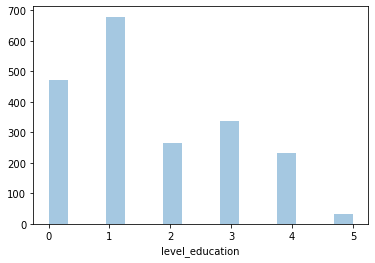

In [86]:
sns.distplot(base_indiv['level_education'], kde = False)

Nous allons maintenant créer deux nouvelles variables indicatrices prenant en compte le type d'organisation pour lequel l'individu interrogé travaille. En effet, les fonctionnaires jouissent d'un statut qui leur assure souvent une protection supplémentaire contre certains risques (sécurité de l'emploi, retraite meilleure, meilleure assurance,...), ce qui peut influer sur la confiance, le bien-être et la demande de protection. À l'inverse, les indépendants sont soumis à plus d'aléas, ce qui peut également se repercuter sur leur vision du monde (souvent plus conservatrice voire plus réactionnaire que dans le reste de la société). À partir de la variable tporgwk (type de travail), nous créons donc une variable indicatrice "public" (correspondant aux valeurs 1, 2 et 3 de tporgwk) et une autre "independant" (correpondant à la valeur 5 de tporgwk).

In [87]:
base_indiv['public'] = np.where(base_indiv['tporgwk'].isin([1,2,3]), 1, 0)
base_indiv['independant'] = np.where(base_indiv['tporgwk']==5, 1, 0)

Avant de régresser les proxys sur les variables objectives, il reste à modifier légérement les autres variables indicatrices disponibles pour que la valeur 0 corresponde à la réponse "non" et la valeur 1 à la réponse "oui" (par défaut, 1 correspond à la valeur "oui" et 2 à la valeur "non").

In [88]:
base_indiv[['rlgblg', 'blgetmg', 'crmvct', 'chldhm', 'uemp3m']] = base_indiv[['rlgblg', 'blgetmg', 'crmvct', 'chldhm', 'uemp3m']].apply(lambda x: x.replace(to_replace = [1,2], value = [1,0]), axis = 0)

On se restreint finalement aux observations ne contenant pas de valeurs manquantes pour pouvoir effectuer nos régressions (pour les deux seules variables que nous n'avions pas encore traité du fait qu'elles avaient un nombre non négligeables de valeurs manquantes).

In [89]:
base_indiv_bis = base_indiv.dropna(subset = ['tporgwk', 'hinctnta']) 

### Proxy confiance

Nous commençons par régresser le niveau de confiance sur ce sous-ensemble de variables objectives.

In [90]:
Y = base_indiv_bis['confiance']
X = base_indiv_bis[['rlgblg', 'blgetmg', 'crmvct', 'gndr', 'agea', 'chldhm', 'level_education', 'uemp3m', 'public', 'independant', 'hinctnta']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              confiance   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     23.92
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           2.34e-46
Time:                        22:07:46   Log-Likelihood:                -2692.2
No. Observations:                1741   AIC:                             5408.
Df Residuals:                    1729   BIC:                             5474.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.9989      0.154     

La qualité du fit est raisonnable (R2 = 0.13) pour une variable subjective. De plus, les signes des coefficients sont globalement cohérents, sauf peut-être pour la variable chldhm. De plus, contrairement à l'intuition évoquée plus haut, le type d'organisation pour lequel les individus travaillent ne semble pas jouer de rôle. Il est enfin étonnant de voir que l'appartenance à une religion ou à une minorité ethnique augmente le degré général de confiance. Si le message religieux peut inciter à faire plus confiance à son prochain, cela ne semble pas être une explication suffisante (si on régresse d'ailleurs la seule variable ppltrst, le coefficient associé à rlgblg devient d'ailleurs non significatif donc cela semble venir d'une plus grande confiance dans les hommes politiques, a priori difficelement explicable).

### Proxy bien-être

In [91]:
Y = base_indiv_bis['bienêtre']
X = base_indiv_bis[['rlgblg', 'blgetmg', 'crmvct', 'gndr', 'agea', 'chldhm', 'level_education', 'uemp3m', 'public', 'independant', 'hinctnta']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:               bienêtre   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     20.09
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.25e-38
Time:                        22:07:54   Log-Likelihood:                -2961.3
No. Observations:                1741   AIC:                             5947.
Df Residuals:                    1729   BIC:                             6012.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.3626      0.180     

La qualité du fit est similaire à celle du dégré de confiance (R2 = 0.11). Le signe et la significativité des coefficients sont ici encore plus attendus que précédemment, à l'exception peut-être de l'appartenance à une minorité ethnique dont le signe est encore une fois positif alors qu'on pourrait s'attendre à ce qu'affronter de potentielles discriminations ou autre difficulté spécifiques (communication avec les autres plus difficile, ...) conduisent à une baisse de bien-être. 

### Proxy protection

In [92]:
Y = base_indiv_bis['protection']
X = base_indiv_bis[['rlgblg', 'blgetmg', 'crmvct', 'gndr', 'agea', 'chldhm', 'level_education', 'uemp3m', 'public', 'independant', 'hinctnta']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:             protection   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     21.24
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           5.97e-41
Time:                        22:07:57   Log-Likelihood:                -3151.0
No. Observations:                1741   AIC:                             6326.
Df Residuals:                    1729   BIC:                             6392.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.2673      0.200     

La qualité du fit est encore une fois similaire aux régressions précédentes (R2 = 0.11). On retrouve des résultats proches des régressions précédentes, à la différence qu'ici l'appartenance à une religion influe négativement sur le sentiment de sécurité (ou dit autrement positivement sur la demande de protection, car rappelons qu'une valeur haute du proxy protection signifie une faible demande de protection). Cela peut s'expliquer par le fait que l'appartenance à une religion est souvent associé à un certain conservatisme, dont l'une des caractéristiques est la demande de sécurité.

### Proxy progressisme

In [93]:
Y = base_indiv_bis['progressisme']
X = base_indiv_bis[['rlgblg', 'blgetmg', 'crmvct', 'gndr', 'agea', 'chldhm', 'level_education', 'uemp3m', 'public', 'independant', 'hinctnta']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:           progressisme   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     45.76
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           4.70e-88
Time:                        22:08:00   Log-Likelihood:                -3271.5
No. Observations:                1741   AIC:                             6567.
Df Residuals:                    1729   BIC:                             6633.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.8931      0.215     

C'est finalement, presque malheureusement, pour la variable la moins pertinente pour expliquer le vote populiste que le fit avec les variables objectives est le meilleur (R2 = 0.22). On peut noter qu'ici seules les variables de niveau d'éducation et de revenu influent positivement cette variable, alors que les variables liées à une plus forte propension au conservatisme (l'appartenance à une religion ou à une minorité ethnique et l'âge) influent négativement sur le niveau de progressisme sociétal.

On peut remarquer avec ces 4 régressions que la variable tporgwk n'est jamais significative. Or, elle avait un nombre non négligeable de valeurs manquantes. On considère donc à partir de maintenant une base plus large, pour laquelle on enlève les valeurs manquantes d'uniquement la variable hinctnta (et de toutes les autres variables objectives, mais pour les autres le nombre de valeurs manquantes est négligeable).

In [124]:
base_indiv_bis = base_indiv.dropna(subset = ['hinctnta'])

Pour conclure sur ces variables objectives individuelles, on peut remarquer que seules le niveau d'éducation et le niveau de vie impactent systématiquement positivement les variables qui impactent négativement le vote populiste. Bien que d'autres variables soient ponctuellement sources d'explications complémentaires, notre analyse tend donc à confirmer, voir à réactualiser dans la nouvelle ère politique qu'ouvre la montée du populisme, l'importance du capital culturel et économique (pour reprendre une typologie bouridieusienne) dans le choix électoral.

## Troisième partie : déterminants régionaux du ressenti individuel

Peut-on néanmoins approfondir encore l'analyse, en ajoutant aux variables objectives individuelles des variables objectives régionales ? Nous nous inspirons ici des travaux de l'analyste politique Jerôme Fourquet, exposés dans son ouvrage *L'archipel français*. L'idée de Jerôme Fourquet est qu'en plus de la situation individuelle de chacun, l'environnement dans lequel on vit peut directement influencer la perception du monde. Par exemple, il montre qu’à niveau d’éducation et de revenu constant, des individus vivant dans une commune ou un quartier avec un taux de chômage important auront plus tendance à voter pour le Front National que ceux vivant dans une commune ou un quartier plus favorisé. Nous essayons dans cette troisième partie de déceler un l’existence d’un tel phénomène au niveau régional (niveau NUTS2 de la nomenclature d’Eurostat, c’est-à-dire correspondant aux régions de France avant la réforme de 2013). Pour cela, nous collectons des variables agrégées sur Eurostat reflétant la santé économique et le dynamisme d’une région, puis nous les incluons dans notre base de donnée et nous régressons nos proxys sur à la fois les variables objectives individuelles et régionales.
Nous nous concentrons sur 4 variables régionales : 

-le PIB par habitant (GDP_PPA)

-le taux de croissance nette de la population (solde migratoire compris) (Population change)

-le chômage de long-terme (LT unemployment)

-le taux d’étudiants post-bac dans la population des 20-24 ans (% students)

Nous récupérons ces données sur le site d’Eurostat au format CSV pour les trois premières variables, et au format excel pour la variable étudiants car les codes régionaux ne sont pas actualisés étant donné que les dernières données disponibles pour cette variable datent de 2012. Or, en passant par le format excel, on peut récupérer le nom littéral des régions et non leur code. Cependant, pour pouvoir ensuite faire correspondre les codes régionaux de la base principale avec les noms de région de cette base, il faut créer une base de correspondance entre nom littéral des régions et leur code NUTS2. Cette correspondance existe sur wikipédia. On fait donc du webscrapping sur ce tableau particulier.

On importe d'abord les quatre bases d'Eurostat.

In [97]:
GDP = pd.read_csv('GDP_PPA.tsv', sep = '\t')
POP =pd.read_csv('Population_change_rate.tsv', sep = '\t')
UNEMP = pd.read_csv('long_term_unemployment.tsv', sep = '\t')
EDUC = pd.read_excel('education.xlsx')

GDP.head()

,"freq,unit,geo\TIME_PERIOD",2016
0,"A,PPS_HAB,FR10",51700 p
1,"A,PPS_HAB,FRB0",25100 p
2,"A,PPS_HAB,FRC1",24800 p
3,"A,PPS_HAB,FRC2",23000 p
4,"A,PPS_HAB,FRD1",24200 p


On renomme la colonne 2016 pour plus de lisibilité.

In [98]:
GDP = GDP.rename(columns={'2016 ': "GDP_PPA1"})
POP = POP.rename(columns={'2016 ': "Population change"})
UNEMP = UNEMP.rename(columns={'2016 ': 'LT unemployment1'})
EDUC = EDUC.rename(columns={'region' : 'region1'})

GDP.head()

,"freq,unit,geo\TIME_PERIOD",GDP_PPA1
0,"A,PPS_HAB,FR10",51700 p
1,"A,PPS_HAB,FRB0",25100 p
2,"A,PPS_HAB,FRC1",24800 p
3,"A,PPS_HAB,FRC2",23000 p
4,"A,PPS_HAB,FRD1",24200 p


Ces bases nécessitent un peu de nettoyage. Tout d'abord, il faut isoler le code régional NUTS2 dans une colonne (pour pouvoir ensuite faire le merge avec notre base principal). On passe par la création de base temporaire tmp pour rendre l'opération plus facile. On procède base par base.

In [99]:
tmp = GDP["freq,unit,geo\TIME_PERIOD"].str.split(",", n = 2, expand = True) 
GDP["nuts2"]= tmp[2]
GDP = GDP.drop(['freq,unit,geo\TIME_PERIOD'], axis=1)

GDP.head()

,GDP_PPA1,nuts2
0,51700 p,FR10
1,25100 p,FRB0
2,24800 p,FRC1
3,23000 p,FRC2
4,24200 p,FRD1


On s'aperçoit que la présence d'un "p" dans la colonne empêche de la convertir en numérique.

In [100]:
tmp2 = GDP["GDP_PPA1"].str.split(" ", n = 1, expand = True) 
GDP["GDP_PPA"]= tmp2[0]
GDP = GDP.drop(['GDP_PPA1'], axis=1)
GDP['GDP_PPA'] = (GDP['GDP_PPA']).astype(float)

GDP.head()

,nuts2,GDP_PPA
0,FR10,51700.0
1,FRB0,25100.0
2,FRC1,24800.0
3,FRC2,23000.0
4,FRD1,24200.0


On réitère l'opération pour les autres bases.

In [101]:
tmp = POP["freq,indic_de,geo\TIME_PERIOD"].str.split(",", n = 2, expand = True) 
POP["nuts2"]= tmp[2]
POP = POP.drop(['freq,indic_de,geo\TIME_PERIOD'], axis=1)
POP = POP[['nuts2', 'Population change']]

POP.head()

,nuts2,Population change
0,FR10,4.8
1,FRB0,-0.6
2,FRC1,-3.1
3,FRC2,-1.6
4,FRD1,-2.1


In [102]:
tmp = UNEMP["freq,unit,geo\TIME_PERIOD"].str.split(",", n = 2, expand = True)
UNEMP["nuts2"]= tmp[2]
UNEMP = UNEMP.drop(['freq,unit,geo\TIME_PERIOD'], axis=1)

tmp2 = UNEMP["LT unemployment1"].str.split(" ", n = 1, expand = True) 
UNEMP["LT unemployment"]= tmp2[0]
UNEMP = UNEMP.drop(['LT unemployment1'], axis=1)

UNEMP['LT unemployment'] = (UNEMP['LT unemployment']).astype(float)

UNEMP.head()

,nuts2,LT unemployment
0,FR10,4.3
1,FRB0,4.4
2,FRC1,4.0
3,FRC2,3.5
4,FRD1,3.7


Pour la base EDUC, le nom de région n'est pas très propre donc on modifie cela en s'aidant d'une expression régulière pour enlever une partie de la colonne région 

In [103]:
EDUC.head()

,region1,% students
0,Île de France,73.3
1,Champagne-Ardenne (NUTS 2013),47.6
2,Picardie (NUTS 2013),37.8
3,Haute-Normandie (NUTS 2013),47.0
4,Centre (FR) (NUTS 2013),41.6


In [104]:
tmp = EDUC["region1"].str.split("\s\(", n = 1, expand = True)
EDUC["region"] = tmp[0]
EDUC = EDUC.drop(['region1'], axis=1)
EDUC = EDUC[['region', '% students']]
EDUC.iloc[4,0] = 'Centre-Val de Loire'
EDUC.iloc[20,0] = 'Provence-Alpes-Côte d’Azur'

EDUC.head()

,region,% students
0,Île de France,73.3
1,Champagne-Ardenne,47.6
2,Picardie,37.8
3,Haute-Normandie,47.0
4,Centre-Val de Loire,41.6


Maintenant il faut trouver la correspondance entre les noms de région (dans la base EDUC) et les codes nuts2 (dans les autres bases régionales et dans la base principale). Pour cela, on va sur la page wikipédia NUTS2 France et on récupère le deuxième tableau

In [105]:
url = "https://en.wikipedia.org/wiki/NUTS_statistical_regions_of_France"

from urllib import request
request_text = request.urlopen(url).read()

page = bs4.BeautifulSoup(request_text, "lxml")

NUTS = page.findAll('table', { 'class' : "wikitable"})[2]

On récupère ensuite chaque ligne, puis on crée un dictionnaire où on associe chaque nom de région avec le code nuts2. Cependant, une petite difficulté s'ajoute car toutes les lignes n'ont pas le même nombre de colonnes (parfois 2 pour les départements, ce qui ne nous intéresse pas ; parfois 4 pour les régions qui n'ont pas changé en 2013, ce qui nous intéresse ; parfois 6 pour les régions qui ont changé en 2013, où il faut là récupérer les "sous-régions" correspondant aux régions d'avant 2013), donc il faut bien faire attention à prendre le bon nom de région.

In [106]:
NUTS_body = NUTS.find('tbody')
rows = NUTS_body.find_all('tr')

dico_NUTS = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) == 4 : 
        dico_NUTS[cols[0]] = cols[1]
    if len(cols) == 6 :
        dico_NUTS[cols[2]] = cols[3]
dico_NUTS

{'Île de France': 'FR10',
 'Centre-Val de Loire': 'FRB0',
 'Bourgogne': 'FRC1',
 'Franche-Comté': 'FRC2',
 'Lower Normandy': 'FRD1',
 'Upper Normandy': 'FRD2',
 'Nord-Pas-de-Calais': 'FRE1',
 'Picardy': 'FRE2',
 'Alsace': 'FRF1',
 'Champagne-Ardenne': 'FRF2',
 'Lorraine': 'FRF3',
 'Pays de la Loire': 'FRG0',
 'Brittany': 'FRH0',
 'Aquitaine': 'FRI1',
 'Limousin': 'FRI2',
 'Poitou-Charentes': 'FRI3',
 'Languedoc-Roussillon': 'FRJ1',
 'Midi-Pyrénées': 'FRJ2',
 'Auvergne': 'FRK1',
 'Rhône-Alpes': 'FRK2',
 'Provence-Alpes-Côte d’Azur': 'FRL0',
 'Corsica': 'FRM0',
 'Guadeloupe (whose NUTS 2 region includes the Collectivity of Saint Martin)': 'FRY1',
 'Martinique': 'FRY2',
 'French Guiana': 'FRY3',
 'La Réunion': 'FRY4',
 'Mayotte': 'FRY5'}

On transforme ensuite le dictionnaire en data frame, et on modifie l'index.

In [108]:
df_NUTS = pd.DataFrame.from_dict(dico_NUTS ,orient='index')
df_NUTS['region'] = df_NUTS.index
df_NUTS = df_NUTS.rename(columns={0: "nuts2"})
df_NUTS.reset_index(drop = True, inplace = True)
df_NUTS

,nuts2,region
0,FR10,Île de France
1,FRB0,Centre-Val de Loire
2,FRC1,Bourgogne
3,FRC2,Franche-Comté
4,FRD1,Lower Normandy
5,FRD2,Upper Normandy
6,FRE1,Nord-Pas-de-Calais
7,FRE2,Picardy
8,FRF1,Alsace
9,FRF2,Champagne-Ardenne


On enlève ensuite les 5 dernières lignes car notre base concerne uniquement la France métropolitaine.

In [109]:
df_NUTS.drop(df_NUTS.tail(5).index, inplace = True)

Enfin, la page wikipédia n'existant qu'en anglais, il faut traduire le nom de certaines régions.

In [110]:
df_NUTS.iloc[4,1] = 'Basse-Normandie'
df_NUTS.iloc[5,1] = 'Haute-Normandie'
df_NUTS.iloc[7,1] = 'Picardie'
df_NUTS.iloc[12,1] = 'Bretagne'
df_NUTS.iloc[21,1] = 'Corse'

On peut enfin lier les bases Eurostat à ce tableau de correspondance.

In [111]:
base_region = df_NUTS.merge(GDP, on='nuts2').merge(POP, on='nuts2').merge(UNEMP,on='nuts2').merge(EDUC, on='region')
base_region

,nuts2,region,GDP_PPA,Population change,LT unemployment,% students
0,FR10,Île de France,51700.0,4.8,4.3,73.3
1,FRB0,Centre-Val de Loire,25100.0,-0.6,4.4,41.6
2,FRC1,Bourgogne,24800.0,-3.1,4.0,46.2
3,FRC2,Franche-Comté,23000.0,-1.6,3.5,48.7
4,FRD1,Basse-Normandie,24200.0,-2.1,3.7,43.9
5,FRD2,Haute-Normandie,26300.0,-1.3,5.9,47.0
6,FRE1,Nord-Pas-de-Calais,24700.0,-0.5,6.6,54.4
7,FRE2,Picardie,22600.0,-0.5,5.6,37.8
8,FRF1,Alsace,28100.0,2.9,4.9,58.1
9,FRF2,Champagne-Ardenne,25400.0,-3.8,4.8,47.6


On merge maintenant cette base régionale avec notre base principale.

In [ ]:
base_indiv_bis = base_indiv_bis.merge(base_region, on='nuts2')

On refait maintenant nos régressions de la partie 2 en incluant les variables régionales.

### Proxy confiance

In [128]:
Y = base_indiv_bis['confiance']
X = base_indiv_bis[['rlgblg', 'blgetmg', 'crmvct', 'gndr', 'level_education', 'hinctnta', 'GDP_PPA', 'Population change', 'LT unemployment', '% students']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              confiance   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     25.73
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           3.69e-46
Time:                        22:47:22   Log-Likelihood:                -2860.5
No. Observations:                1845   AIC:                             5743.
Df Residuals:                    1834   BIC:                             5804.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.4036      0.29

Cette première régression sur le proxy confiance est décevante car seule une des quatre variables régionales (% étudiants dans la population âgée de 20 à 24 ans) est significative au niveau 10%. Cela peut s’expliquer par le niveau trop agrégé des régions, qui rend la distinction des territoires très peu fines, contrairement à l’analyse par commune ou quartier. Si on applique la même régression sans contrôler pour les variables individuelles, on voit que sans surprise le PIB par habitant devient significatif (car les habitants d'une région plus riche ont tendance à être eux-mêmes plus riche ; or, le niveau de confiance est positivement corrélé au niveau de richess).

In [129]:
Y = base_indiv_bis['confiance']
X = base_indiv_bis[['GDP_PPA', 'Population change', 'LT unemployment', '% students']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              confiance   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     12.34
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           6.58e-10
Time:                        22:48:32   Log-Likelihood:                -2957.1
No. Observations:                1845   AIC:                             5924.
Df Residuals:                    1840   BIC:                             5952.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.3215      0.29

### Proxy bien-être

In [130]:
Y = base_indiv_bis['bienêtre']
X = base_indiv_bis[['blgetmg', 'crmvct', 'agea', 'uemp3m', 'level_education', 'hinctnta', 'GDP_PPA', 'Population change', 'LT unemployment', '% students']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:               bienêtre   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     25.99
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.20e-46
Time:                        22:50:21   Log-Likelihood:                -3129.7
No. Observations:                1845   AIC:                             6281.
Df Residuals:                    1834   BIC:                             6342.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.7919      0.35

La régression de la variable bien-être est plus intéressante. On voit que même en contrôlant pour les variables individuelles, la variable % students est très significative et positive, ce qui suggère que le dynamisme apporté par la présence d'étudiants au sein d'une région pourrait avoir un impact sur le bien-être subjectif des individus y vivant. En revanche, le signe de GDP_PPA est étonnant : à niveau de richesse (et éducation, ...) individuelle donnée, vivre dans une région plus riche diminuerait le bien-être subjectif. On peut voir que ce lien n'est pas persistant si on enlève les observations de la région Ile de France, où le PIB par habitant est largement plus élevé qu'ailleurs mais où la vie est aussi plus chère (en effet, la partité de pouvoir d'achat de la base Eurostat n'est pas entre les régions mais entre les pays). Vivre en Ile de France peut être synonyme de contraintes spécifiques (dont la chéreté de la vie, la densité de population, ...) qui baissent le bien-être perçu.

In [131]:
base_sans_paris = base_indiv_bis[base_indiv_bis['nuts2']!='FR10']

Y = base_sans_paris['bienêtre']
X = base_sans_paris[['blgetmg', 'crmvct', 'agea', 'uemp3m', 'level_education', 'hinctnta', 'GDP_PPA', 'Population change', 'LT unemployment', '% students']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:               bienêtre   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     22.59
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           4.97e-40
Time:                        22:57:16   Log-Likelihood:                -2778.9
No. Observations:                1634   AIC:                             5580.
Df Residuals:                    1623   BIC:                             5639.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2046      0.61

On voit que notre problème disparaît. En revanche, le coefficient associé à % students a très peu bougé (alors même que la région Ile de France fait aussi exception sur cette variable), ce qui prouve la robustesse de l'effet de cette variable.

### Proxy protection

In [132]:
Y = base_indiv_bis['protection']
X = base_indiv_bis[['rlgblg', 'crmvct', 'agea', 'level_education', 'hinctnta', 'GDP_PPA', 'Population change', 'LT unemployment', '% students']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:             protection   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     28.43
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.30e-46
Time:                        22:59:27   Log-Likelihood:                -3308.4
No. Observations:                1845   AIC:                             6637.
Df Residuals:                    1835   BIC:                             6692.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.3451      0.38

Cette régression donne aussi des résultats intéressants et différents des précédentes. En effet, les coefficients associés aux variables Population change et LT unemployment sont pour la première fois significatifs. Les régions où le dynamisme démographique est le plus fort sont moins méfiantes vis-à-vis de l'extérieur (peut-être du fait d'une meilleure connaissance de l'autre) et celles où le taux de chômage de long-terme est le plus élevé le sont plus (peut-être par l'assimilation de l'ouverture de la France au monde extérieur à un vecteur de risques économique et culturel).

### Proxy progressisme

In [133]:
Y = base_indiv_bis['progressisme']
X = base_indiv_bis[['rlgblg', 'blgetmg', 'agea', 'level_education', 'hinctnta', 'GDP_PPA', 'Population change', 'LT unemployment', '% students']]
X = sm.tools.add_constant(X)
mod = st.OLS(Y,X)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:           progressisme   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     61.67
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           6.16e-99
Time:                        23:05:47   Log-Likelihood:                -3467.3
No. Observations:                1845   AIC:                             6955.
Df Residuals:                    1835   BIC:                             7010.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.9427      0.41

Cette dernière régression donne uniquement la variable Population change comme significative, ce qui peut s'interpréter de la même façon que dans la régression précédente.

## Conclusion

Pour conclure, notre projet avait donc pour but d’expliquer causalement le vote populiste de droite en France. Si, dans un premier temps, nous avons construit des proxys afin d’expliquer subjectivement le vote FN -à l’aide d’un modèle Logit- nous avons voulu pousser l’analyse afin d’expliquer ces proxys (regroupant des variables d’ordre subjective) avec des variables objectives individuelles. En effet, si l’explication du vote FN par des variables subjectives permet de briser l’explication classique du vote par des variables objectives telles que le revenu ou l’âge, il est pertinent de tenter de comprendre ces variables subjectives par des caractéristiques sociodémographiques individuelles. Mais il est aussi possible de comprendre ces caractéristiques subjectives individuelles non pas par des critères propres à l’individu mais par des caractéristiques propres à l’environnement dans lequel il évolue (ici à l’échelle de la région). Il nous semblait en effet pertinent de changer autant que possible la focale d’analyse dans notre projet, c’est-à-dire d’utiliser dans un premier temps des variables explicatives d’ordre subjective puis d’ordre objective, mais aussi de tenter d’expliquer ces variables subjectives à la fois à l’échelle micro puis macro.

Une voie possible d'approfondissement de ce travail serait de mieux prendre en compte les poids attribués à chaque individu, bien que ces poids ne permettent pas de régler le manque de représentativité de la base (notamment pour le vote, comme nous l'avons expliqué plus haut).